Feature Selection Using Decision Tree/Random Forest

First we will do this for the regular crime data (no three year gap between features and crime rate) and then we will do it for the three year gap data.

In [1]:
import pandas as pd


In [2]:
Data_1 = pd.read_csv('/Users/alyzehjiwani/Downloads/Data/Final Data Used/Crime_Data.csv')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
Data_1 = Data_1.drop('Unnamed: 0',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(Data_1.drop('C_Rate',axis=1), Data_1['C_Rate'], test_size=.3,random_state=22)



In [5]:
X_train.shape, X_test.shape

((784, 12), (336, 12))

In [6]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf=5)




In [7]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [8]:
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.metrics import classification_report, accuracy_score
from pydot import graph_from_dot_data

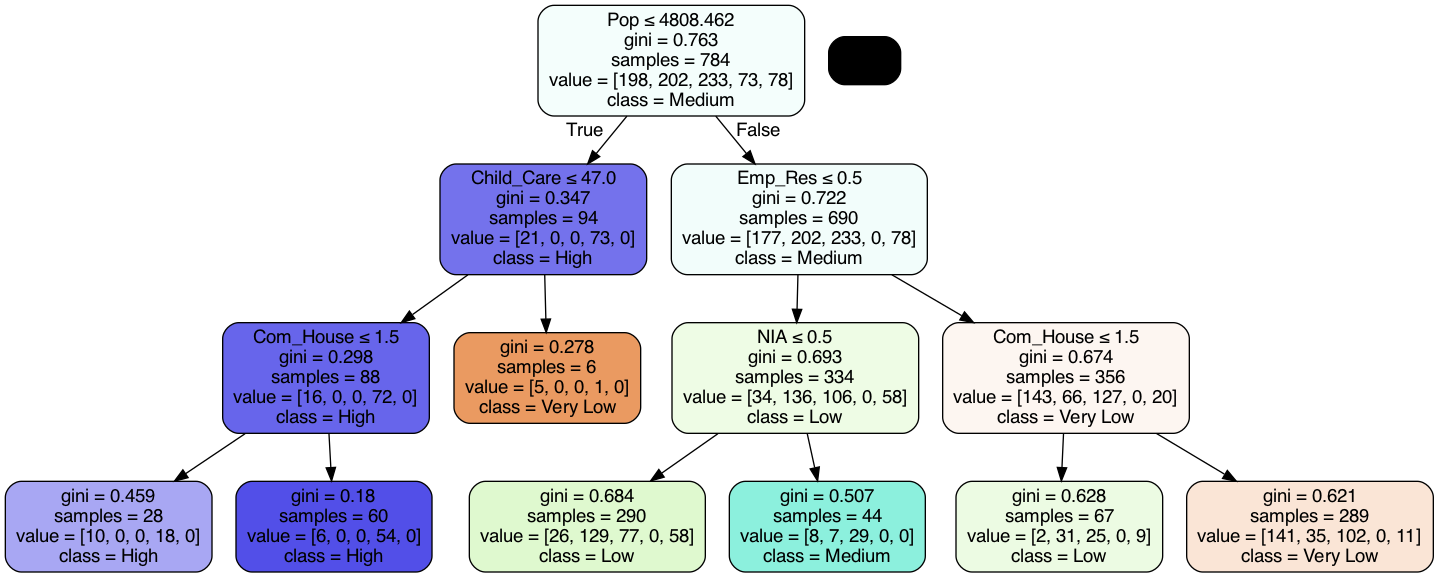

In [9]:
xvar = Data_1.drop('C_Rate', axis = 1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph,)= graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())




Population appears to be the most important feature here

In [10]:
predictions = model.predict(X_test)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Decision Tree Train Accuracy: 0.5191326530612245
Decision Tree Test Accuracy: 0.49107142857142855


In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       0.49      0.67      0.56        82
         Low       0.39      0.85      0.54        78
      Medium       0.55      0.06      0.11       103
   Very High       0.86      0.97      0.92        39
    Very Low       0.00      0.00      0.00        34

    accuracy                           0.49       336
   macro avg       0.46      0.51      0.42       336
weighted avg       0.48      0.49      0.40       336



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

We will now use permutation feature importance to further evaluate the importance of our features

In [12]:
model.score(X_test,y_test)

0.49107142857142855

In [13]:
from sklearn.inspection import permutation_importance

running permutation importance on our test set:

In [14]:
r = permutation_importance(model, X_test, y_test, n_repeats = 30, random_state = 0)

In [15]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{list(Data_1.columns.values)[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Pop     0.147 +/- 0.011
Com_House0.088 +/- 0.017
Child_Care0.054 +/- 0.012


running it on our train set:

In [16]:
r_1 = permutation_importance(model, X_train, y_train, n_repeats = 30, random_state = 0)


In [17]:
for i in r_1.importances_mean.argsort()[::-1]:
    if r_1.importances_mean[i] - 2 * r_1.importances_std[i] > 0:
        print(f"{list(Data_1.columns.values)[i]:<8}"
              f"{r_1.importances_mean[i]:.3f}"
              f" +/- {r_1.importances_std[i]:.3f}")

Pop     0.132 +/- 0.008
Com_House0.089 +/- 0.013
Child_Care0.071 +/- 0.009
Inflation0.039 +/- 0.008
Ad_Ed   0.009 +/- 0.002


Lets see how our model score changes keeping only the most "important" features.
We will start by only keeping pop com_house and child_care

In [18]:
train_1 = X_train.drop(['Year', 'N_ID', 'Ad_Ed','Emp_Res','Sub_Trt', 'Trans_House','Recreation','Inflation','NIA'], axis = 1)
test_1 = X_test.drop(['Year', 'N_ID', 'Ad_Ed','Emp_Res','Sub_Trt', 'Trans_House','Recreation','Inflation','NIA'], axis = 1)

In [19]:
model_1 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth = 3,  min_samples_leaf=5)



In [20]:
model_1.fit(train_1, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

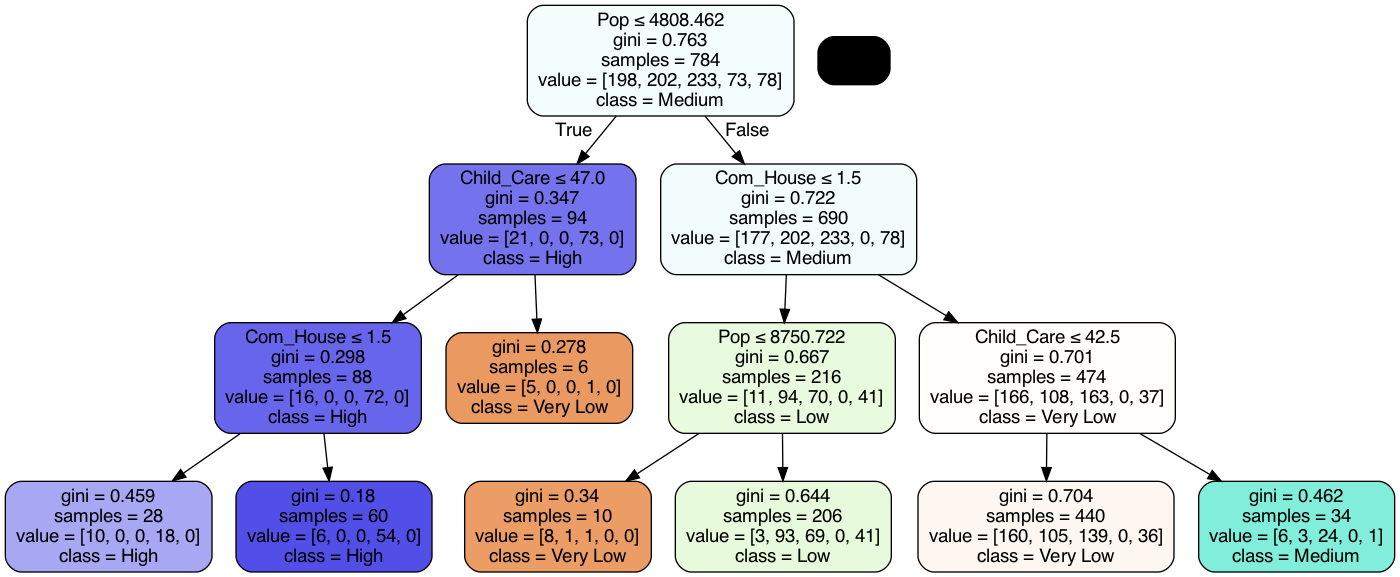

In [21]:
xvar_1 = Data_1.drop(['Year', 'N_ID', 'Ad_Ed','Emp_Res','Sub_Trt', 'Trans_House','Recreation','Inflation','NIA','C_Rate'], axis = 1)
feature_cols_1 = xvar_1.columns
dot_data_1 = StringIO()
export_graphviz(model_1, out_file = dot_data_1, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_1, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_1,)= graph_from_dot_data(dot_data_1.getvalue())
Image(graph_1.create_png())



In [22]:
predictions = model_1.predict(test_1)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_1.predict(train_1)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model_1.predict(test_1)))

Decision Tree Train Accuracy: 0.461734693877551
Decision Tree Test Accuracy: 0.4375


we will add in inflation

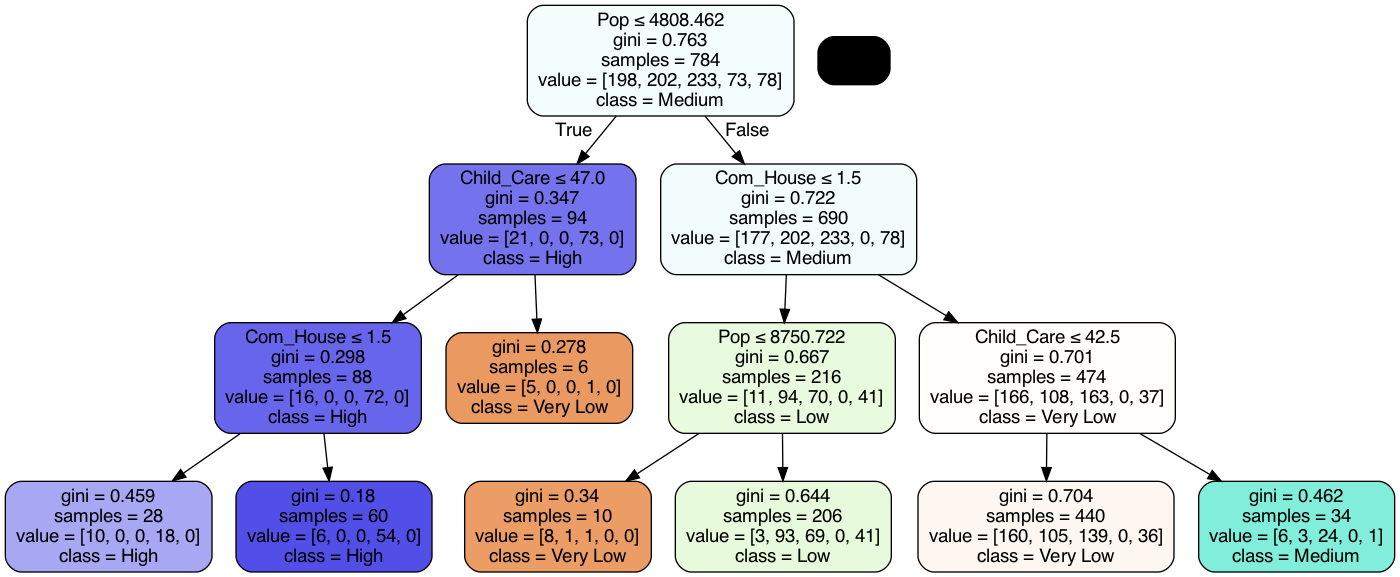

In [23]:
train_2 = X_train.drop(['Year', 'N_ID', 'Ad_Ed','Emp_Res','Sub_Trt', 'Trans_House','Recreation','NIA'], axis = 1)
test_2 = X_test.drop(['Year', 'N_ID', 'Ad_Ed','Emp_Res','Sub_Trt', 'Trans_House','Recreation','NIA'], axis = 1)

model_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth = 3,  min_samples_leaf=5)

model_2.fit(train_2, y_train)

xvar_2 = Data_1.drop(['Year', 'N_ID', 'Ad_Ed','Emp_Res','Sub_Trt', 'Trans_House','Recreation','NIA','C_Rate'], axis = 1)
feature_cols_2 = xvar_2.columns
dot_data_2 = StringIO()
export_graphviz(model_2, out_file = dot_data_2, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_2, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_2,)= graph_from_dot_data(dot_data_2.getvalue())
Image(graph_2.create_png())

In [24]:
predictions = model_2.predict(test_2)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_2.predict(train_2)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model_2.predict(test_2)))

Decision Tree Train Accuracy: 0.461734693877551
Decision Tree Test Accuracy: 0.4375


Accuracy didnt really change at all. So inflation may not be contributing to our model. We remove inflation and add Ad_Ed

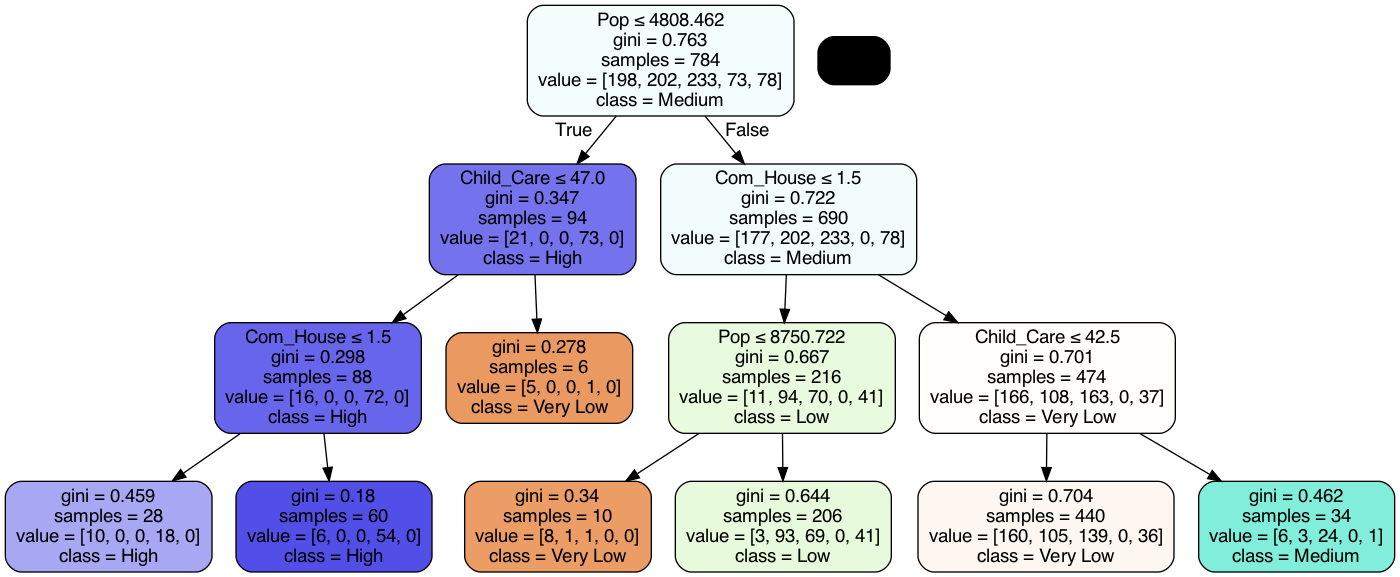

In [25]:
train_3 = X_train.drop(['Year', 'N_ID', 'Inflation','Emp_Res','Sub_Trt', 'Trans_House','Recreation','NIA'], axis = 1)
test_3 = X_test.drop(['Year', 'N_ID', 'Inflation','Emp_Res','Sub_Trt', 'Trans_House','Recreation','NIA'], axis = 1)

model_3 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth = 3,  min_samples_leaf=5)

model_3.fit(train_3, y_train)

xvar_3 = Data_1.drop(['Year', 'N_ID', 'Inflation','Emp_Res','Sub_Trt', 'Trans_House','Recreation','NIA','C_Rate'], axis = 1)
feature_cols_3 = xvar_3.columns
dot_data_3 = StringIO()
export_graphviz(model_3, out_file = dot_data_3, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_3, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_3,)= graph_from_dot_data(dot_data_3.getvalue())
Image(graph_3.create_png())

In [26]:
predictions = model_3.predict(test_3)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_3.predict(train_3)))
print ("Decision Tree Test Accuracy:", accuracy_score(y_test, model_3.predict(test_3)))

Decision Tree Train Accuracy: 0.461734693877551
Decision Tree Test Accuracy: 0.4375


According to our results, Com_House, Child_Care and Pop appear to be the most importnat features for this model